# `cm4twc` exercise 2 (a solution)

For this exercise, you may find useful information in the [online documentation](https://cm4twc-org.github.io/cm4twc)

1. Import the framework

In [1]:
import cm4twc

## choose your components

2. Get the `SurfaceLayerComponent` from the GR4 model

In [2]:
from cm4twccontrib.gr4 import SurfaceLayerComponent

3. Get the `SubSurfaceComponent` from the GR4 model

In [3]:
from cm4twccontrib.gr4 import SubSurfaceComponent

4. Get the `OpenWaterComponent` from the RFM model

In [4]:
from cm4twccontrib.rfm import OpenWaterComponent

## create domains for space and time

### space

5. Define a __1km resolution__ space domain using the [`BritishNationalGrid`](https://cm4twc-org.github.io/cm4twc/api/methods/cm4twc.BritishNationalGrid.from_extent_and_resolution.html#cm4twc.BritishNationalGrid.from_extent_and_resolution) over __Scotland__ 

   (__hint:__ a region with eastings from 80km to 500km, and northings from 550km to 1000km includes Scotland, [see on a map](https://gridreferencefinder.com/#gr=JV0000000000|500000_s__c__s_1000000|1,NV8000050000|80000_s__c__s_550000|1,OV0000050000|500000_s__c__s_550000|1,HV8000000000|80000_s__c__s_1000000|1))
   
   (__hint:__ easting is also known as "projection_x_coordinate", northing is also known as "projection_y_coordinate")

In [5]:
sd = cm4twc.BritishNationalGrid.from_extent_and_resolution(
    projection_x_coordinate_extent=(80e3, 500e3),
    projection_x_coordinate_resolution=1e3,
    projection_y_coordinate_extent=(550e3, 1000e3),
    projection_y_coordinate_resolution=1e3
)

### time

6. Define a __daily__ time domain for __hydrological year__ 2017

   (__hint:__ in the UK, a hydrological year starts at 09:00 GMT on 1st October, [Happy New Water Year!](https://nrfa.ceh.ac.uk/news-and-media/news/happy-new-water-year))

In [6]:
from datetime import datetime, timedelta
td_d = cm4twc.TimeDomain.from_start_end_step(
    start=datetime(2016, 10, 1, 9, 0, 0),
    end=datetime(2017, 10, 1, 9, 0, 0),
    step=timedelta(days=1)
)

7. Define an __hourly__ time domain for __hydrological year__ 2017

In [7]:
td_h = cm4twc.TimeDomain.from_start_end_step(
    start=datetime(2016, 10, 1, 9, 0, 0),
    end=datetime(2017, 10, 1, 9, 0, 0),
    step=timedelta(hours=1)
)

## load datasets

### data for components

8. Get the list of input data requirements for the `SurfaceLayerComponent` of GR4J

In [8]:
print(SurfaceLayerComponent.inputs_metadata)

potential_water_evapotranspiration_flux:
  kind: dynamic
  units: kg m-2 s-1
rainfall_flux:
  kind: dynamic
  units: kg m-2 s-1



9. Gather the input dataset required for the `SurfaceLayerComponent` of GR4J choosing the __only__ relevant ones in the list below:
   
   - */data/demo-data/in/driving/chess_specific_humidity.nc*
   - */data/demo-data/in/driving/chess_rainfall_flux.nc*
   - */data/demo-data/in/driving/chess_wind_speed.nc*
   - */data/demo-data/in/driving/chess_air_temperature.nc*
   - */data/demo-data/in/driving/chess_potential_water_evapotranspiration_flux.nc*

In [9]:
ds_sl = cm4twc.DataSet(
    ['/data/demo-data/in/driving/chess_rainfall_flux.nc',
     '/data/demo-data/in/driving/chess_potential_water_evapotranspiration_flux.nc']
)

10. Gather the input dataset required for the `OpenWaterComponent` of RFM (using file */data/demo-data/in/ancillary/chess_flow_accumulation.nc*)

In [10]:
ds_ow = cm4twc.DataSet(
    '/data/demo-data/in/ancillary/chess_flow_accumulation.nc',
    name_mapping={
        'flow accumulation': 'i_area'
    }
)

### flow direction for spacedomain

11. Check which component requires flow direction

In [11]:
print(
    SurfaceLayerComponent.requires_flow_direction(), 
    SubSurfaceComponent.requires_flow_direction(), 
    OpenWaterComponent.requires_flow_direction()
)

False False True


12. Read in with `cf` the flow data */data/demo-data/in/ancillary/chess_flow_direction.nc* and assign it to the space domain you've created

In [12]:
import cf
sd.flow_direction = cf.read('/data/demo-data/in/ancillary/chess_flow_direction.nc')[0]

### land sea mask for spacedomain

13. Read in with `cf` the land sea mask data */data/demo-data/in/ancillary/chess_land_sea_mask.nc* and assign it to the space domain you've created

In [13]:
sd.land_sea_mask = cf.read('/data/demo-data/in/ancillary/chess_land_sea_mask.nc')[0]

## configure your components

14. Check the parameter requirements for your three components

In [14]:
print(
    '\n'.join([
        f"surfacelayer:\n---\n{SurfaceLayerComponent.parameters_metadata!s}", 
        f"subsurface:\n---\n{SubSurfaceComponent.parameters_metadata!s}", 
        f"openwater:\n---\n{OpenWaterComponent.parameters_metadata!s}"
    ])
)

surfacelayer:
---
x1:
  units: kg m-2

subsurface:
---
x1:
  units: kg m-2
x4:
  units: d

openwater:
---
c_land:
  description: kinematic wave speed for surface flow in a land grid box on the river
    routing grid
  units: m s-1
c_river:
  description: kinematic wave speed for surface flow in a river grid box on the river
    routing grid
  units: m s-1
cb_land:
  description: kinematic wave speed for subsurface flow in a land grid box on the
    river routing grid
  units: m s-1
cb_river:
  description: kinematic wave speed for subsurface flow in a river grid box on the
    river routing grid
  units: m s-1
ret_l:
  description: land return flow fraction (resolution dependent)
  units: '1'
ret_r:
  description: river return flow fraction (resolution dependent)
  units: '1'
river_length:
  description: length of river reach
  units: m



The parameter values to use for GR4 are as follow:

   - $x_1 = 347 \; kg.m^{-2}$
   - $x_2 = -0.0458 \; kg.m^{-2}.d^{-1}$
   - $x_3 = 120 \; kg.n^{-2}$
   - $x_4 = 0.938 \; d$

The parameter values to use for RFM are as follows:

   - $c_{land} = 0.40 \; m.s^{-2}$
   - $cb_{land} = 0.05 \; m.s^{-2}$
   - $c_{river} = 0.50 \; m.s^{-2}$
   - $cb_{river} = 0.05 \; m.s^{-2}$
   - $ret_{l} = 0.005$
   - $ret_{r} = 0.005$
   - $river \; length = 1000 \; m$
   
The constant value to use for RFM is as follows:

   - $a_{thres} = 20$

15. Configure your `SurfaceLayerComponent` so that:

   - it runs at a daily timestep
   - it runs on a 1km resolution (British National Grid)
   - it is given the data it needs
   - it is given the parameter values it needs
   - it saves its records in *'/data/demo-data/out-yourfirstname-yourlastname'* (please replace first/lastname accordingly)

In [15]:
sl = SurfaceLayerComponent(
    saving_directory='/data/demo-data/out-firstname-lastname',
    timedomain=td_d,
    spacedomain=sd,
    dataset=ds_sl,
    parameters={
        'x1': (347, 'kg m-2')
    }
)

16. Configure your `SubSurfaceComponent` so that:

   - it runs at a daily timestep
   - it runs on a 1km resolution (British National Grid)
   - it is given the parameter values it needs
   - it saves its records in *'/data/demo-data/out-yourfirstname-yourlastname'* (please replace first/lastname accordingly)
   - it records daily mean *subsurface_runoff* and 5-day maximum *soil_water_stress*

In [16]:
ss = SubSurfaceComponent(
    saving_directory='/data/demo-data/out-firstname-lastname',
    timedomain=td_d,
    spacedomain=sd,
    parameters={
        'x1': (347, 'kg m-2'),
        'x4': (0.938, 'd')
    },
    records={
        'subsurface_runoff': {
            timedelta(days=1): ['mean']
        },
        'soil_water_stress': {
            timedelta(days=5): ['maximum']
        }
    }
)

17. Configure your `OpenWaterComponent` so that:

   - it runs at an hourly timestep
   - it runs on a 1km resolution (British National Grid)
   - it is given the parameter values it needs
   - it is given the constant value it needs
   - it saves its records in *'/data/demo-data/out-yourfirstname-yourlastname'* (please replace first/lastname accordingly)
   - it records daily mean __and__ 5-day minimum *outgoing_water_volume_transport_along_river_channel*

In [17]:
ow = OpenWaterComponent(
    saving_directory='/data/demo-data/out-firstname-lastname',
    timedomain=td_h,
    spacedomain=sd,
    dataset=ds_ow,
    parameters={
        'c_land': (0.40, 'm s-1'),
        'cb_land': (0.05, 'm s-1'),
        'c_river': (0.50, 'm s-1'),
        'cb_river': (0.05, 'm s-1'),
        'ret_l': (0.005, '1'),
        'ret_r': (0.005, '1'),
        'river_length': (1000, 'm')
    },
    constants={
        'a_thresh': (20, '1')
    },
    records={
        'outgoing_water_volume_transport_along_river_channel': {
            timedelta(days=1): ['mean'],
            timedelta(days=5): ['minimum']
        }
    }
)

## form a model from your components

18. Put your three components together

   (__hint:__ use *'/data/demo-data/out-yourfirstname-yourlastname'* (please replace first/lastname accordingly) to store your configuration and outputs files, and use e.g. "exercise-run" for your model identifier)

In [18]:
model = cm4twc.Model(
    identifier='exercise-run',
    config_directory='/data/demo-data/out-firstname-lastname',
    saving_directory='/data/demo-data/out-firstname-lastname',
    surfacelayer=sl,
    subsurface=ss,
    openwater=ow
)

## use your model

19. Spin up your model for a year (hydrological year 2017)

In [19]:
model.spin_up(
    start=datetime(2016, 10, 1, 9),
    end=datetime(2017, 10, 1, 9)
)

/data/conda/hj-38-nompi/lib/python3.8/site-packages/cm4twccontrib/rfm/openwater.py:150: RuntimeWarning: theta river surface not within [0, 1]
  warnings.warn(
/data/conda/hj-38-nompi/lib/python3.8/site-packages/cm4twccontrib/rfm/openwater.py:160: RuntimeWarning: theta land surface not within [0, 1]
  warnings.warn(
/data/conda/hj-38-nompi/lib/python3.8/site-packages/numpy/ma/core.py:1021: RuntimeWarning: overflow encountered in multiply
  result = self.f(da, db, *args, **kwargs)


20. Start your model simulation while resquesting restart snapshots every 60 days

In [20]:
model.simulate(
    dumping_frequency=timedelta(days=60)
)

21. Using `cf` and `cfplot`, plot the last time step of the daily mean subsurface runoff produced the subsurface component.

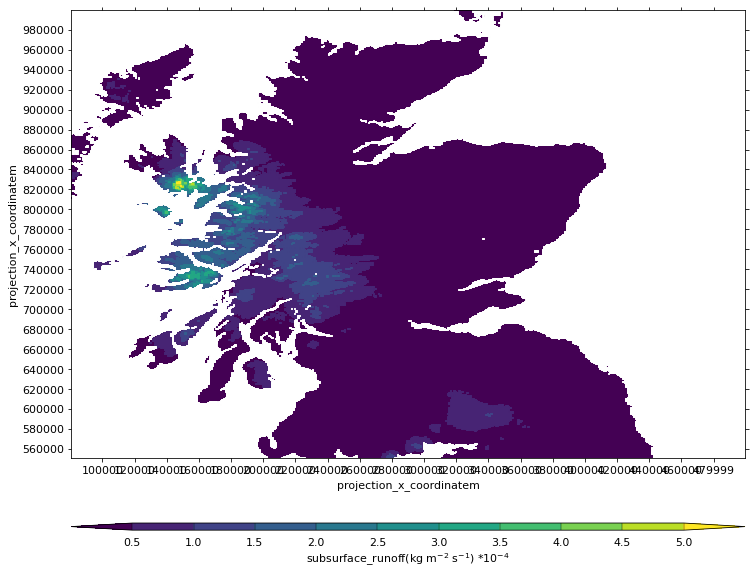

In [21]:
import cf
import cfplot

%matplotlib inline

runoff = cf.read(f'/data/demo-data/out-firstname-lastname/exercise-run_subsurface_run_records_daily.nc').select_field('subsurface_runoff')
cfplot.con(runoff[-1], blockfill=True, lines=False)